In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

import numpy as np
from numpy.linalg import pinv

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from keras.models import Model

from imblearn.under_sampling import RandomUnderSampler

In [ ]:
df_2019 = pd.read_csv('/content/drive/MyDrive/University_of_Tehran/Pro. Sajedi/archive/archive/Jan_2019_ontime.csv')
df_2020 = pd.read_csv('/content/drive/MyDrive/University_of_Tehran/Pro. Sajedi/archive/archive/Jan_2020_ontime.csv')

df_2019['year'] = 2019
df_2020['year'] = 2020

dataset = pd.concat([df_2019,df_2020])



```
'DAY_OF_MONTH': Day of the month.
'DAY_OF_WEEK': Day of the week.
'OP_UNIQUE_CARRIER': Unique transport code.
'OP_CARRIER_AIRLINE_ID': Unique aviation operator code.
'OP_CARRIER': IATA code of the operator.
'TAIL_NUM': Tail number.
'OP_CARRIER_FL_NUM': Flight number.
'ORIGIN_AIRPORT_ID': Origin airport ID.
'ORIGIN_AIRPORT_SEQ_ID': Origin airport ID - SEQ.
'ORIGIN': Airport of Origin.
'DEST_AIRPORT_ID': ID of the destination airport.
'DEST_AIRPORT_SEQ_ID': Destination airport ID - SEQ.
'DEST': Destination airport.
'DEP_TIME': Flight departure time.
'DEP_DEL15': Departure delay indicator
'DEP_TIME_BLK': block of time (hour) where the match has been postponed.
'ARR_TIME': Flight arrival time.
'ARR_DEL15': Arrival delay indicator.
'CANCELLED': Flight cancellation indicator.
'DIVERTED': Indicator if the flight has been diverted.
'DISTANCE': Distance between airports.
```





**Useful links**
*   [Understanding the Data](https://www.kaggle.com/code/vasudevmaduri/eda-understanding-the-data)
*   [About dataset](https://www.kaggle.com/datasets/divyansh22/flight-delay-prediction/)

*   [Predicting the Delay of Flights](https://www.kaggle.com/code/brunovinicius154/predicting-the-delay-of-flights-auc-0-88)






*Selected feature*
```
'DAY_OF_MONTH': Day of the month.
'DAY_OF_WEEK': Day of the week.
'OP_CARRIER_FL_NUM': Flight number.
'ORIGIN': Airport of Origin.
'DEST': Destination airport.
'DEP_TIME': Flight departure time.
'DEP_DEL15': Departure delay indicator
'DEP_TIME_BLK': block of time (hour) where the match has been postponed.
'ARR_TIME': Flight arrival time.
'ARR_DEL15': Arrival delay indicator.
'CANCELLED': Flight cancellation indicator.
'DIVERTED': Indicator if the flight has been diverted.
'DISTANCE': Distance between airports.
```

# Understanding the data

In [ ]:
dataset.isnull().sum()

DAY_OF_MONTH                   0
DAY_OF_WEEK                    0
OP_UNIQUE_CARRIER              0
OP_CARRIER_AIRLINE_ID          0
OP_CARRIER                     0
TAIL_NUM                    3241
OP_CARRIER_FL_NUM              0
ORIGIN_AIRPORT_ID              0
ORIGIN_AIRPORT_SEQ_ID          0
ORIGIN                         0
DEST_AIRPORT_ID                0
DEST_AIRPORT_SEQ_ID            0
DEST                           0
DEP_TIME                   23016
DEP_DEL15                  23054
DEP_TIME_BLK                   0
ARR_TIME                   24136
ARR_DEL15                  26100
CANCELLED                      0
DIVERTED                       0
DISTANCE                       0
Unnamed: 21              1191331
year                           0
dtype: int64

# Process on data

In [ ]:
drop_cols = ['OP_UNIQUE_CARRIER','OP_CARRIER_AIRLINE_ID','OP_CARRIER','TAIL_NUM',
             'ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_ID',
             'DEST_AIRPORT_SEQ_ID','Unnamed: 21']

data = dataset.drop(columns=drop_cols, axis=1)

data = data.set_index('OP_CARRIER_FL_NUM')


Number of nan variable each columns
```
DEP_TIME                   23016
DEP_DEL15                  23054
ARR_TIME                   24136
ARR_DEL15                  26100
```



### Add Some Features

#### add distance range to dataset

In [ ]:
data['DISTANCE_cat'] = pd.qcut(data['DISTANCE'], q=4)

#### missing values

In [ ]:
data.dropna(inplace=True)

#### add arrival dely block column

In [ ]:
def arr_time(x):

  if x >= 600 and x <= 659:
    return '0600-0659'
  elif x>=1400 and x<=1459:
    return '1400-1459'
  elif x>=1200 and x<=1259:
    return '1200-1259'
  elif x>=1500 and x<=1559:
    return '1500-1559'
  elif x>=1900 and x<=1959:
    return '1900-1959'
  elif x>=900 and x<=959:
    return '0900-0959'
  elif x>=1000 and x<=1059:
    return  '1000-1059'
  elif x>=2000 and x<=2059:
    return '2000-2059'
  elif x>=1300 and x<=1359:
    return '1300-1359'
  elif x>=1100 and x<=1159:
    return '1100-1159'
  elif x>=800 and x<=859:
    return '0800-0859'
  elif x>=2200 and x<=2259:
    return '2200-2259'
  elif x>=1600 and x<=1659:
    return '1600-1659'
  elif x>=1700 and x<=1759:
    return '1700-1759'
  elif x>=2100 and x<=2159:
    return '2100-2159'
  elif x>=700 and x<=759:
    return '0700-0759'
  elif x>=1800 and x<=1859:
    return '1800-1859'
  elif x>=1 and x<=559:
    return '0001-0559'
  elif x>=2300 and x<=2400:
    return '2300-2400'


# We can create ARR_TIME_BLOCK.
data['ARR_TIME'] = data['ARR_TIME'].astype('int')
data['ARR_TIME_BLK'] = data['ARR_TIME'].apply(lambda x :arr_time(x))
data.reset_index(inplace=True)
data.head()

,OP_CARRIER_FL_NUM,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year,DISTANCE_cat,ARR_TIME_BLK
0,3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722,0.0,0.0,0.0,300.0,2019,"(30.999, 366.0]",0700-0759
1,3281,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633,0.0,0.0,0.0,596.0,2019,"(366.0, 640.0]",1600-1659
2,3282,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329,0.0,0.0,0.0,229.0,2019,"(30.999, 366.0]",1300-1359
3,3283,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625,0.0,0.0,0.0,223.0,2019,"(30.999, 366.0]",1600-1659
4,3284,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940,0.0,0.0,0.0,579.0,2019,"(366.0, 640.0]",1900-1959


#### add count delay time in block deprature

In [ ]:
# Number of Dep in each Block
data1 = data.copy()
count_dep_del15 = data1.groupby('DEP_TIME_BLK').DEP_DEL15.sum()
df_count_dep_del15 = pd.DataFrame(count_dep_del15.reset_index())
data1 = pd.merge(data1, df_count_dep_del15, on='DEP_TIME_BLK', how='inner')
data1.rename({'DEP_DEL15_y':'count_dep_time_blk','DEP_DEL15_x':'DEP_DEL15' }, inplace=True, axis=1)


#### add count delay time in block arrivial

In [ ]:

# Number of ARR in each Block
data2 = data1.copy()
count_arr_del15 = data2.groupby('ARR_TIME_BLK').ARR_DEL15.count()
df_count_arr_del15 = pd.DataFrame(count_arr_del15.reset_index())
data2 = pd.merge(data2, df_count_arr_del15, on='ARR_TIME_BLK', how='inner')
data2.rename({'ARR_DEL15_y':'count_arr_time_blk','ARR_DEL15_x':'ARR_DEL15' }, inplace=True, axis=1)


## Data Prepration

### Split data to train and test (time series time)

In [ ]:
# Sort data by their time
sort_data = data2.copy()
sort_data['DEP_TIME'] = sort_data['DEP_TIME'].astype(int)

# Function to convert HHMM format into HH:MM format
def convert_time(time_val):
    time_str = f"{time_val:04d}"
    return f"{time_str[:-2]}:{time_str[-2:]}"

sort_data['DEP_TIME_hours'] = sort_data['DEP_TIME'].apply(convert_time)


sort_data['DEPARTURE_DATETIME'] = pd.to_datetime(sort_data['year'].astype(str) + '-' + '01' + '-' + sort_data['DAY_OF_MONTH'].astype(str) + ' ' + sort_data['DEP_TIME_hours'], errors='coerce')
sort_data.dropna(inplace=True)   # We have 76 raw nan variable

data_sorted = sort_data.sort_values(by='DEPARTURE_DATETIME')

split_index = int(len(data_sorted) * 0.8)

train_data_splited = data_sorted.iloc[:split_index]
test_data_splited = data_sorted.iloc[split_index:]

In [ ]:
X_features = ['DAY_OF_MONTH', 'DAY_OF_WEEK','DEP_TIME_BLK', 'DEP_TIME', 'ARR_TIME',
              'CANCELLED', 'DIVERTED', 'DISTANCE','year','DISTANCE_cat',
              'ARR_TIME_BLK', 'count_dep_time_blk', 'count_arr_time_blk']

y_features = ['DEP_DEL15', 'ARR_DEL15']

X_train = train_data_splited.loc[:, X_features]
y_train = ((train_data_splited[y_features[0]] == 1.0) | (train_data_splited[y_features[1]] == 1.0)).astype(float)

X_test = test_data_splited.loc[:, X_features]
y_test = ((test_data_splited[y_features[0]] == 1.0) | (test_data_splited[y_features[1]] == 1.0)).astype(float)



### data preprocessing

In [ ]:
categorical_features = ['DAY_OF_MONTH', 'DAY_OF_WEEK','DEP_TIME_BLK','CANCELLED', 'DIVERTED', 'year','DISTANCE_cat','ARR_TIME_BLK']
numerical_features = ['DEP_TIME', 'ARR_TIME', 'DISTANCE', 'count_dep_time_blk', 'count_arr_time_blk']

categorical_transformer = OneHotEncoder(sparse=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Training Models

## Multi-Layer Perceptron

In [ ]:
input_dim = X_train_transformed.shape[1]
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
learning_rate = 1e-2

model_MLP = Sequential()
model_MLP.add(Dense(150, input_dim=input_dim, activation='relu', activity_regularizer=regularizers.l1(learning_rate)))
model_MLP.add(Dense(100, activation='relu'))
model_MLP.add(Dense(50, activation='relu'))
model_MLP.add(Dense(10, activation='relu'))
model_MLP.add(Dense(1, activation='sigmoid'))


model_MLP.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_MLP.fit(X_train_transformed, y_train, epochs=50, batch_size=128, validation_split=0.1, callbacks=[early_stopping])
# model_MLP.save('/content/drive/MyDrive/University_of_Tehran/Pro. Sajedi/MLP_model.h5')

Epoch 1/50
6554/6554 [==============================] - 44s 6ms/step - loss: 0.3446 - accuracy: 0.8745 - val_loss: 0.3177 - val_accuracy: 0.8906
Epoch 2/50
6554/6554 [==============================] - 39s 6ms/step - loss: 0.3152 - accuracy: 0.8881 - val_loss: 0.3151 - val_accuracy: 0.8919
Epoch 3/50
6554/6554 [==============================] - 39s 6ms/step - loss: 0.3124 - accuracy: 0.8893 - val_loss: 0.3098 - val_accuracy: 0.8941
Epoch 4/50
6554/6554 [==============================] - 50s 8ms/step - loss: 0.3110 - accuracy: 0.8894 - val_loss: 0.3101 - val_accuracy: 0.8929
Epoch 5/50
6554/6554 [==============================] - 38s 6ms/step - loss: 0.3096 - accuracy: 0.8899 - val_loss: 0.3092 - val_accuracy: 0.8940
Epoch 6/50
6554/6554 [==============================] - 37s 6ms/step - loss: 0.3083 - accuracy: 0.8903 - val_loss: 0.3135 - val_accuracy: 0.8935
Epoch 7/50
6554/6554 [==============================] - 44s 7ms/step - loss: 0.3073 - accuracy: 0.8907 - val_loss: 0.3115 - val_ac

In [ ]:
model_MLP.save('/content/drive/MyDrive/University_of_Tehran/Pro. Sajedi/MLP_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Evaluate MLP

7283/7283 [==============================] - 18s 2ms/step - loss: 0.2503 - accuracy: 0.9230
Loss: 0.250315397977829, Accuracy: 0.9230188131332397
7283/7283 [==============================] - 15s 2ms/step
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96    200939
         1.0       0.85      0.54      0.66     32092

    accuracy                           0.92    233031
   macro avg       0.89      0.76      0.81    233031
weighted avg       0.92      0.92      0.92    233031

Confusion Matrix:
[[197909   3030]
 [ 14909  17183]]


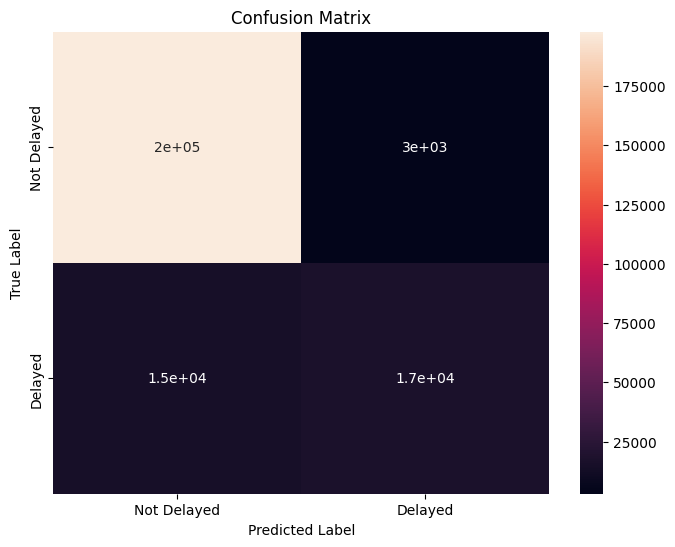

In [ ]:
loss_MLP, accuracy_MLP = model_MLP.evaluate(X_test_transformed, y_test)
print(f'Loss: {loss_MLP}, Accuracy: {accuracy_MLP}')

predictions_MLP = model_MLP.predict(X_test_transformed)
binary_predictions = (predictions_MLP > 0.5).astype(int)
report_MLP = classification_report(y_test, binary_predictions)
print(report_MLP)

conf_matrix_MLP = confusion_matrix(y_test, binary_predictions)
print("Confusion Matrix:")
print(conf_matrix_MLP)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_MLP, annot=True, xticklabels=["Not Delayed", "Delayed"],
            yticklabels=["Not Delayed", "Delayed"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Extreme Machine Learning

In [ ]:
# np.save('/content/drive/MyDrive/University_of_Tehran/Pro. Sajedi/X_train_transformed.npy', X_train_transformed)
# np.save('/content/drive/MyDrive/University_of_Tehran/Pro. Sajedi/X_test_transformed.npy', X_test_transformed)
# np.save('/content/drive/MyDrive/University_of_Tehran/Pro. Sajedi/y_train.npy', y_train)
# np.save('/content/drive/MyDrive/University_of_Tehran/Pro. Sajedi/y_test.npy', y_test)

X_train_transformed = np.load('/content/drive/MyDrive/University_of_Tehran/Pro. Sajedi/X_train_transformed.npy')
X_test_transformed = np.load('/content/drive/MyDrive/University_of_Tehran/Pro. Sajedi/X_test_transformed.npy')
y_train = np.load('/content/drive/MyDrive/University_of_Tehran/Pro. Sajedi/y_train.npy')
y_test = np.load('/content/drive/MyDrive/University_of_Tehran/Pro. Sajedi/y_test.npy')

### Resampling data

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_transformed, y_train)

y_resampled = np.array(y_resampled).reshape(-1, 1)


### train model ELM

In [ ]:
class ELM:
    def __init__(self, input_dim, hidden_dim, activation='sigmoid'):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.activation = activation
        self.weights_input_hidden = np.random.randn(input_dim, hidden_dim)
        self.bias_input_hidden = np.random.randn(1, hidden_dim)
        self.weights_hidden_output = None
        self.bias_hidden_output = None

    def apply_activation(self, x):
        if self.activation == 'sigmoid':
            return self.sigmoid(x)
        elif self.activation == 'relu':
            return self.relu(x)
        else:
            raise ValueError("Unsupported activation function")

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def relu(self, x):
        return np.maximum(0, x)

    def train_network(self, input_data, target_data):
        hidden_output = self.apply_activation(np.dot(input_data, self.weights_input_hidden) + self.bias_input_hidden)

        pinv = np.linalg.pinv(hidden_output)
        self.weights_hidden_output = np.dot(pinv, target_data)
        self.bias_hidden_output = np.zeros((1, target_data.shape[1]))

    def make_predictions(self, input_data):
        hidden_output = self.apply_activation(np.dot(input_data, self.weights_input_hidden) + self.bias_input_hidden)
        output = np.dot(hidden_output, self.weights_hidden_output) + self.bias_hidden_output
        return output

input_dim = X_train_transformed.shape[1]
hidden_dim = 750

elm_model = ELM(input_dim, hidden_dim, activation='relu')
elm_model.train_network(X_resampled, y_resampled)

### Evaluate ELM

              precision    recall  f1-score   support

         0.0       0.93      0.76      0.83    200939
         1.0       0.29      0.64      0.40     32092

    accuracy                           0.74    233031
   macro avg       0.61      0.70      0.62    233031
weighted avg       0.84      0.74      0.77    233031

Confusion Matrix:
[[151837  49102]
 [ 11620  20472]]


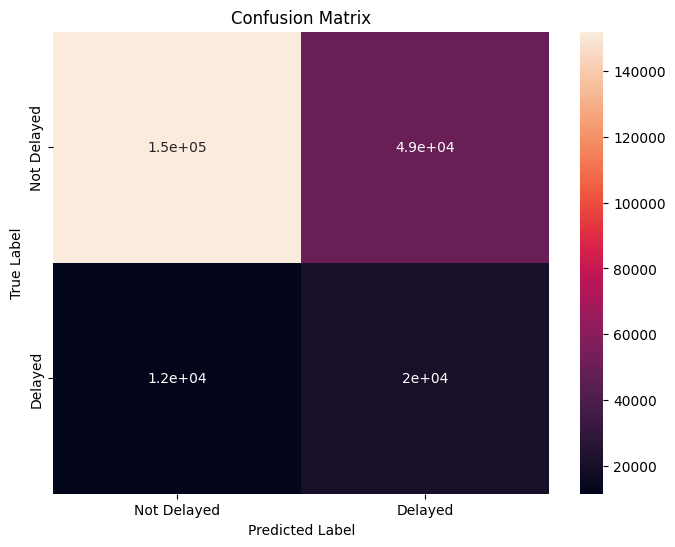

In [ ]:
y_pred_elm = elm_model.make_predictions(X_test_transformed)
predicted_binary = (y_pred_elm > 0.5).astype(int)

report_ELM = classification_report(y_test, predicted_binary)
print(report_ELM)

conf_matrix_ELM = confusion_matrix(y_test, predicted_binary)
print("Confusion Matrix:")
print(conf_matrix_ELM)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ELM, annot=True, xticklabels=["Not Delayed", "Delayed"],
            yticklabels=["Not Delayed", "Delayed"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Auto-Encoder

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

encoding_dim = 512
actual_dim = X_train_transformed.shape[1]


input_layer = Input(shape=(actual_dim,))

encoded = Dense(1024, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(1024, activation='relu')(encoded)
decoded = Dense(actual_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(X_train_transformed, X_train_transformed,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test_transformed, X_test_transformed))

# Evaluate the model
mse = autoencoder.evaluate(X_test_transformed, X_test_transformed, batch_size=128)
print("Mean Squared Error on Test Set:", mse)


Epoch 1/20
7283/7283 [==============================] - 35s 5ms/step - loss: -118024216576.0000 - val_loss: -458064920576.0000
Epoch 2/20
7283/7283 [==============================] - 30s 4ms/step - loss: -1979057045504.0000 - val_loss: -4107568152576.0000
Epoch 3/20
7283/7283 [==============================] - 31s 4ms/step - loss: -9533567008768.0000 - val_loss: -15481677283328.0000
Epoch 4/20
7283/7283 [==============================] - 31s 4ms/step - loss: -28476109225984.0000 - val_loss: -40741992660992.0000
Epoch 5/20
7283/7283 [==============================] - 30s 4ms/step - loss: -66252823330816.0000 - val_loss: -87559384334336.0000
Epoch 6/20
7283/7283 [==============================] - 29s 4ms/step - loss: -131884361187328.0000 - val_loss: -165307570192384.0000
Epoch 7/20
7283/7283 [==============================] - 29s 4ms/step - loss: -236042728767488.0000 - val_loss: -284521517809664.0000
Epoch 8/20
7283/7283 [==============================] - 30s 4ms/step - loss: -39118994

### Evaluate AutoeEncoder

In [ ]:
X_test_pred_autoencoder = autoencoder.predict(X_test_transformed)
mse = np.mean(np.power(X_test_transformed - X_test_pred_autoencoder, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test})
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)

print("Mean Squared Error on Test Set:", mse)

plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

#### MLP model after encoder

In [ ]:
X_train_encoder = autoencoder.predict(X_train_transformed)

input_dim = X_train_encoder.shape[1]
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
learning_rate = 1e-2

model_MLP = Sequential()
model_MLP.add(Dense(150, input_dim=input_dim, activation='relu', activity_regularizer=regularizers.l1(learning_rate)))
model_MLP.add(Dense(100, activation='relu'))
model_MLP.add(Dense(50, activation='relu'))
model_MLP.add(Dense(10, activation='relu'))
model_MLP.add(Dense(1, activation='sigmoid'))

model_MLP.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_MLP.fit(X_train_encoder, y_train, epochs=50, batch_size=128, validation_split=0.1, callbacks=[early_stopping])


Epoch 1/50
6554/6554 [==============================] - 33s 5ms/step - loss: 0.4183 - accuracy: 0.8328 - val_loss: 0.3921 - val_accuracy: 0.8461
Epoch 2/50
6554/6554 [==============================] - 33s 5ms/step - loss: 0.3942 - accuracy: 0.8456 - val_loss: 0.3809 - val_accuracy: 0.8525
Epoch 3/50
6554/6554 [==============================] - 36s 6ms/step - loss: 0.3876 - accuracy: 0.8484 - val_loss: 0.3811 - val_accuracy: 0.8524
Epoch 4/50
6554/6554 [==============================] - 30s 5ms/step - loss: 0.3836 - accuracy: 0.8507 - val_loss: 0.3767 - val_accuracy: 0.8560
Epoch 5/50
6554/6554 [==============================] - 30s 5ms/step - loss: 0.3782 - accuracy: 0.8533 - val_loss: 0.3645 - val_accuracy: 0.8630
Epoch 6/50
6554/6554 [==============================] - 34s 5ms/step - loss: 0.3714 - accuracy: 0.8581 - val_loss: 0.3600 - val_accuracy: 0.8639
Epoch 7/50
6554/6554 [==============================] - 40s 6ms/step - loss: 0.3684 - accuracy: 0.8600 - val_loss: 0.3638 - val_ac

7283/7283 [==============================] - 14s 2ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95    200939
         1.0       0.80      0.42      0.55     32092

    accuracy                           0.91    233031
   macro avg       0.86      0.70      0.75    233031
weighted avg       0.90      0.91      0.89    233031



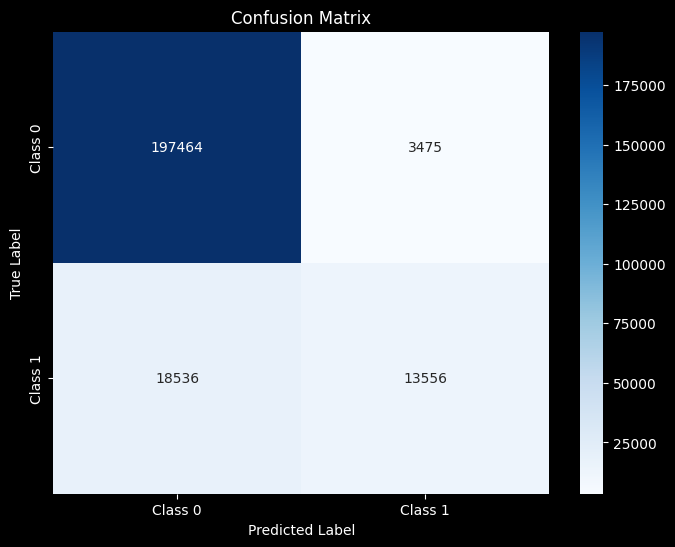

In [ ]:
X_test_encoder = autoencoder.predict(X_test_transformed)

y_pred = model_MLP.predict(X_test_encoder)
binary_y_pred = (y_pred > 0.5).astype(int)
print("Classification Report:")

print(classification_report(y_test, binary_y_pred))

conf_matrix = confusion_matrix(y_test, binary_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()